In [4]:
# a. Loading and Pre-processing the Image Data 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 


In [5]:
# Load CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 


In [6]:
# Normalize pixel values (0–255 → 0–1) 
x_train = x_train.astype("float32") / 255.0 
x_test = x_test.astype("float32") / 255.0 


In [7]:
# One-hot encode labels (10 classes) 
num_classes = 10 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes) 


In [8]:
print("Training data shape:", x_train.shape, y_train.shape) 
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 10)
Testing data shape: (10000, 32, 32, 3) (10000, 10)


In [9]:
# b. Defining the Model’s Architecture 
# ================================ 
model = keras.Sequential([ 
    # First convolution block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    # Second convolution block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Third convolution block
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


D:\software\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model 
model.compile(optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]) 
model.summary() 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# c. Training the Model 
# ================================ 
history = model.fit(x_train, y_train, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.2, 
    verbose=1
) 


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.4114 - loss: 1.6032 - val_accuracy: 0.5029 - val_loss: 1.3986
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5519 - loss: 1.2522 - val_accuracy: 0.5813 - val_loss: 1.1916
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6102 - loss: 1.0964 - val_accuracy: 0.6295 - val_loss: 1.0433
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6532 - loss: 0.9808 - val_accuracy: 0.6489 - val_loss: 1.0142
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6890 - loss: 0.8856 - val_accuracy: 0.6753 - val_loss: 0.9313
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7178 - loss: 0.8088 - val_accuracy: 0.6904 - val_loss: 0.8979
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7381 - loss: 0.7461 - val_accuracy: 0.7024 - val_loss: 0.8658
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7621 - loss: 0.6769 - val_acc

In [12]:
# d. Estimating the Model’s Performance 
# ================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) 
print(f"\nTest Accuracy: {test_acc:.4f}") 
print(f"Test Loss: {test_loss:.4f}") 



Test Accuracy: 0.7100
Test Loss: 0.8854


In [13]:
# Plot training history 
plt.figure(figsize=(12,5)) 


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

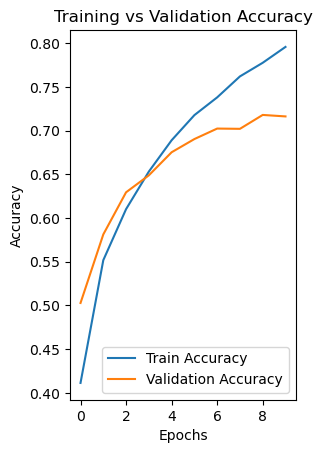

In [14]:
# Plot accuracy 
plt.subplot(1,2,1) 
plt.plot(history.history["accuracy"], label="Train Accuracy") 
plt.plot(history.history["val_accuracy"], label="Validation Accuracy") 
plt.title("Training vs Validation Accuracy") 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 


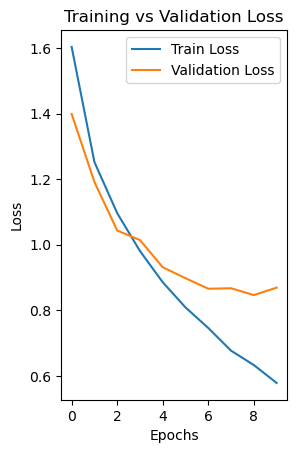

In [16]:
# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()